# Feature Extraction

In [37]:
import pandas as pd
import re
from sklearn import preprocessing


def cleanData(text):
    removeList = ["@handle","@handle:"]
    text_r = " ".join([char for char in text.split(' ') if char not in removeList and not any(i.isdigit() for i in char) and char.isdigit]) 
    return text_r

def removeHyperLink(text):
    text,count = re.subn(r'http?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    return(text,count)
    
def removeSpChar(text):
    new = re.sub('[@_!#$%^&*()<>?/\|}{~:\']' ,'', text)
    count = len(text) - len(new)
    return new,count

def removeRT(text):
    text_r = " ".join([char for char in text.split(' ') if char != 'RT'])
    return text_r


##Normalization


from sklearn import preprocessing

def normalizeColumn(df_orig,column):
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df_orig[[column]].values #returns a numpy array
    x_scaled = min_max_scaler.fit_transform(x)
    df_orig[[column]] = pd.DataFrame(x_scaled)
    return df_orig


df_orig = pd.read_table('../data/train_tweets.txt',names=('id','rtweet'))

df_orig['tweet'] = df_orig['rtweet'].apply(lambda x: cleanData(x))


/Users/saransh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


In [38]:

df_orig['tweet'],df_orig['NumLink'] = zip(*df_orig['tweet'].map(removeHyperLink))
df_orig['hashtags'] = df_orig['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df_orig['tweet'],df_orig['spCount'] =  zip(*df_orig['tweet'].map(removeSpChar))

df_orig['wdCount'] = df_orig['tweet'].apply(lambda x: len(str(x).split(" ")))
df_orig['chCount'] = df_orig['tweet'].str.len()
df_orig['isCap'] = df_orig['tweet'].apply(lambda x: len([x for x in x.split() if x[0].isupper()]))
df_orig['isRT'] = df_orig['tweet'].apply(lambda x: 1 if 'RT' in x else 0)
df_orig['tweet'] = df_orig['tweet'].apply(lambda x: removeRT(x))


df_orig['tweet'] = df_orig['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))


## Rate of RT
#df_orig['atweet'] = df_orig.groupby("id")['tweet'].transform(lambda x: ' '.join(x))
df_orig['TotTw'] = df_orig.groupby("id")['tweet'].transform('count')
df_orig['RTrate'] = df_orig.groupby("id")['isRT'].transform('sum')
df_orig['RTrate'] = df_orig['RTrate']/df_orig['TotTw']



df_orig.tail()

,id,rtweet,tweet,NumLink,hashtags,spCount,wdCount,chCount,isCap,isRT,TotTw,RTrate
328190,4357,Steelbox Demonstrates Open Video Framework wit...,steelbox demonstrates open video framework wit...,1,0,0,13,102,10,0,16,0.0
328191,4357,Small Businesses Rely on Sage to Help Them Rid...,small businesses rely on sage to help them rid...,0,1,1,13,75,9,0,16,0.0
328192,4357,TimeSight Systems™ Announces Next-Generation P...,timesight systems™ announces next-generation p...,0,1,1,12,107,9,0,16,0.0
328193,4357,Diebold Makes Its Leading Monitoring Solutions...,diebold makes its leading monitoring solutions...,0,1,1,10,77,8,0,16,0.0
328194,4357,GVI Security Solutions to Introduce AutoIP™ VM...,gvi security solutions to introduce autoip™ vm...,0,1,1,14,103,11,0,16,0.0


In [25]:

#normalizeColumn(df_orig,'chCount')
#normalizeColumn(df_orig,'wdCount')
#normalizeColumn(df_orig,'spCount')
#normalizeColumn(df_orig,'isCap')
#normalizeColumn(df_orig,'hashtags')



In [39]:
## Tokenize and stem data

import nltk
from nltk.stem.porter import PorterStemmer
import nltk
from nltk.corpus import stopwords


def tokenize(text):
    stop_words = set(stopwords.words('english')) 
    word_tokens = nltk.word_tokenize(text)
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    stems = []
    for item in filtered_sentence:
        stems.append(PorterStemmer().stem(item))
    return ' '.join(word for word in stems)


df_orig['tweet'] = df_orig['tweet'].apply(lambda x: tokenize(x))
df_orig['tweet'] 


0                              let tri catch live next week
1         go watch grey big screen - thursday indulg ... ..
2                            pleasur patrick ... .hope well
3         hi travel lot lot come next month - recov pneu...
4         look drink clean go green purchas bottl w filt...
5         ft. hood offici confirm soldier initi held sus...
6                                      mickey mous get make
7                                        u get invit justin
8                             think still good friend - lol
9                                  rememb fine - u what new
10                                  that great - good coach
11         dont want pictur u sit - lol - understand ... ..
12                     d- thank rt ... .are go womma summit
13                              grrr ... .you must go crazi
14                              hi - catch trip - news dale
15                 your look great list follow check mine =
16        retail ’ engag custom social m

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(df_orig['tweet'])
X = vectorizer.transform(df_orig['tweet'])



In [40]:
df2 = df_orig.drop(columns=["rtweet","tweet","isRT","TotTw"])
X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [41]:
df2

,id,NumLink,hashtags,spCount,wdCount,chCount,isCap,RTrate
0,8746,0,0,2,8,36,1,0.351648
1,8746,0,0,1,11,65,3,0.351648
2,8746,0,0,1,6,40,2,0.351648
3,8746,0,0,3,26,121,3,0.351648
4,8746,0,0,3,16,81,7,0.351648
5,8746,0,0,0,15,94,3,0.351648
6,8746,0,0,0,8,38,6,0.351648
7,8746,0,0,1,7,31,2,0.351648
8,8746,0,0,1,12,46,2,0.351648
9,8746,0,0,4,11,42,3,0.351648


In [30]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1000)
matrix_lowrank = svd.fit_transform(X)


KeyboardInterrupt: 

In [42]:
matrix_lowrank

array([[ 2.56246441e-01,  9.97247091e-03, -2.68343596e-02, ...,
         1.47758070e-04,  1.90563029e-03,  1.92965919e-03],
       [ 3.79685133e-01, -1.47744259e-01, -2.26968174e-01, ...,
         7.12749651e-03,  4.70655767e-03, -1.26565750e-03],
       [ 1.06803687e-01, -1.16667289e-02, -1.41596850e-02, ...,
        -1.03765969e-03,  5.93654677e-02,  2.52147369e-02],
       ...,
       [ 1.14427520e-01,  8.72994470e-02, -7.42091395e-03, ...,
        -8.58378377e-03, -2.69624388e-03,  9.48129201e-03],
       [ 1.29039344e-01,  2.53441843e-02, -2.46558334e-02, ...,
        -3.68887762e-02, -1.39309647e-02,  1.43300460e-02],
       [ 1.69693276e-02,  1.35956680e-02,  1.49578342e-03, ...,
         8.59640007e-03, -1.35575720e-02,  7.96816183e-02]])

In [43]:
count_vect_df = pd.DataFrame(matrix_lowrank)



In [44]:
combined_df = pd.concat([df2, count_vect_df], axis=1)

#combined_df = pd.concat([df_orig.frop, df_orig['tweetBoW]], axis=1)
df_out = combined_df

In [45]:
df_out

,id,NumLink,hashtags,spCount,wdCount,chCount,isCap,RTrate,0,1,...,990,991,992,993,994,995,996,997,998,999
0,8746,0,0,2,8,36,1,0.351648,2.562464e-01,9.972471e-03,...,-6.510791e-03,-2.015602e-05,-2.435773e-03,-1.806627e-03,-4.529897e-03,6.288936e-03,3.018869e-03,1.477581e-04,1.905630e-03,1.929659e-03
1,8746,0,0,1,11,65,3,0.351648,3.796851e-01,-1.477443e-01,...,-2.357680e-02,-4.507806e-03,-4.815468e-03,-6.500911e-03,-5.732321e-03,2.867294e-03,1.664705e-02,7.127497e-03,4.706558e-03,-1.265658e-03
2,8746,0,0,1,6,40,2,0.351648,1.068037e-01,-1.166673e-02,...,7.307489e-03,5.905989e-03,-2.355966e-02,-2.913027e-02,-1.027215e-02,-4.377113e-02,1.818525e-03,-1.037660e-03,5.936547e-02,2.521474e-02
3,8746,0,0,3,26,121,3,0.351648,2.499137e-01,2.521324e-02,...,-6.468747e-03,-2.224285e-03,6.074465e-03,-2.738225e-03,-2.464397e-04,6.144642e-03,-4.460813e-03,1.524328e-02,9.594991e-03,3.616735e-04
4,8746,0,0,3,16,81,7,0.351648,4.162445e-01,-1.319027e-01,...,-5.954597e-02,6.615520e-02,5.354687e-02,1.591083e-02,-1.025856e-01,-8.194450e-02,-3.531308e-02,1.051803e-01,-2.764842e-02,-1.062488e-01
5,8746,0,0,0,15,94,3,0.351648,2.608963e-02,2.255440e-02,...,-7.003585e-03,-7.534067e-02,8.401226e-02,-1.371148e-02,4.206384e-02,7.237527e-03,5.740311e-02,-2.695083e-02,4.065737e-02,1.638449e-02
6,8746,0,0,0,8,38,6,0.351648,5.251246e-01,-2.612890e-01,...,-2.494595e-03,1.241414e-04,-2.105165e-03,3.794709e-03,-3.408558e-03,-3.071565e-03,-2.029309e-03,3.686385e-03,2.657268e-03,-3.549707e-03
7,8746,0,0,1,7,31,2,0.351648,4.183269e-01,-2.749447e-01,...,3.268788e-05,1.242279e-02,-1.188208e-02,1.169841e-03,-2.598066e-02,-3.774517e-03,9.709004e-03,4.434360e-03,-1.437380e-02,-1.189112e-04
8,8746,0,0,1,12,46,2,0.351648,4.424789e-01,-7.230078e-02,...,-1.093371e-03,-1.999759e-03,-1.486382e-03,-6.490508e-04,-2.486040e-03,1.141802e-03,1.072961e-03,-2.985930e-04,-8.238730e-04,-2.203090e-03
9,8746,0,0,4,11,42,3,0.351648,2.827288e-01,8.645504e-01,...,1.034440e-02,-1.676534e-02,5.079606e-03,6.958029e-03,-1.479667e-03,-1.223209e-02,-2.901359e-03,-1.145933e-02,1.920395e-03,-7.513675e-03


# Model Training

In [46]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

dataset = df_out
#print(dataset)
#names = ['authorID','NumLink','hastags','spCount','word_count','char_count','isCapitalize','RT_count']
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:,0].values

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
encoded_Y




array([8137, 8137, 8137, ..., 4029, 4029, 4029])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.20,random_state=1000)


In [48]:
X_train.shape

(262556, 1007)

In [51]:
input_dim = X_train.shape[1]
model = Sequential()
model.add(Dense(32, input_dim=input_dim, activation='relu')) # input dimension = dimension of festure vector
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(9293, activation='softmax')) # output layer = no. of classes
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.metrics_names)


['loss', 'acc']


In [ ]:
batch_size = 16
epochs = 30
history = model.fit(X_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test,y_test))



Train on 262556 samples, validate on 65639 samples
Epoch 1/30
262556/262556 [==============================] - 290s 1ms/step - loss: 8.7542 - acc: 0.0024 - val_loss: 8.4794 - val_acc: 0.0058
Epoch 2/30
262556/262556 [==============================] - 295s 1ms/step - loss: 8.0600 - acc: 0.0092 - val_loss: 7.8300 - val_acc: 0.0138
Epoch 3/30
262556/262556 [==============================] - 298s 1ms/step - loss: 7.4513 - acc: 0.0174 - val_loss: 7.3676 - val_acc: 0.0214
Epoch 4/30
262556/262556 [==============================] - 299s 1ms/step - loss: 6.9920 - acc: 0.0258 - val_loss: 7.0071 - val_acc: 0.0315
Epoch 5/30
262556/262556 [==============================] - 285s 1ms/step - loss: 6.6944 - acc: 0.0333 - val_loss: 6.7882 - val_acc: 0.0358
Epoch 6/30
262556/262556 [==============================] - 270s 1ms/step - loss: 6.4988 - acc: 0.0388 - val_loss: 6.6352 - val_acc: 0.0409
Epoch 7/30
262556/262556 [==============================] - 279s 1ms/step - loss: 6.3585 - acc: 0.0430 - val_

In [18]:
#train_histt = model.fit(X_train, y_train, epochs=100, batch_size=256, verbose=1)


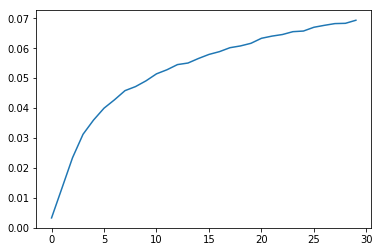

In [20]:
import matplotlib.pyplot as plt
#plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.show()

In [21]:
scores = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss=%s'% scores[0])
print('Test accuracy=%s'% scores[1])

65639/65639 [==============================] - 5s 76us/step
Test loss=6.303918014782021
Test accuracy=0.06345312999961461


In [22]:
ANN_MODEL = "ANN_MODEL_v2"
VECTORIZER = "Vectorizer_v2"
ENCODER = "ENCODER_v2"
SVD = "SVD_V2"

In [23]:
import pickle

def storeModel(model,filename):
    pickle.dump(model, open(filename, 'wb'))
    
storeModel(model,ANN_MODEL)
storeModel(vectorizer,VECTORIZER)
storeModel(encoder,ENCODER)


In [24]:
storeModel(svd,SVD)

# Testing

In [33]:
def readFile(path):
    with open(path) as f:
        lineList = f.readlines()
    return lineList

In [36]:
test_data = readFile('../data/test_tweets_unlabeled.txt')
df_test = pd.DataFrame(test_data,columns = ['rtweet'])


In [ ]:
df_test['tweet'] = df_test['rtweet'].apply(lambda x: cleanData(x))
df_test['tweet'],df_test['NumLink'] = zip(*df_test['tweet'].map(removeHyperLink))
df_test['hashtags'] = df_test['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df_test['tweet'],df_test['spCount'] =  zip(*df_test['tweet'].map(removeSpChar))
df_test['wdCount'] = df_test['tweet'].apply(lambda x: len(str(x).split(" ")))
df_test['chCount'] = df_test['tweet'].str.len()
df_test['isCap'] = df_test['tweet'].apply(lambda x: len([x for x in x.split() if x[0].isupper()]))
df_test['RTrate'] = df_test['tweet'].apply(lambda x: 1 if 'RT' in x else 0)
df_test['tweet'] = df_test['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_test['tweet'] = df_test['tweet'].apply(lambda x: tokenize(x))


In [ ]:
test_sentences  = vectorizer.transform(df_test['tweet'])
matrix_test_lowrank = svd.transform(test_sentences)


In [ ]:
count_test_df = pd.DataFrame(matrix_test_lowrank)

## Concatenate 
df2_test = df_orig.drop(columns=["rtweet","tweet"])
combined_test_df = pd.concat([df2_test, count_test_df], axis=1)
combined_test_df


In [ ]:
X_testdata = combined_test_df.iloc[:, 0:].values



y_test = model.predict_classes(X_testdata)
